In [41]:
import flapjack
from flapjack import registry as reg
from flapjack import analysis as analysis
from flapjack import tables as tables
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import scipy
from scipy.optimize import curve_fit
%matplotlib inline

In [50]:
registry = reg.Registry(database_name='data', username='maca', password='macata125')

In [78]:
# First we make a query to the database by applying filters 
qall = registry.queryAll()
qexp= qall.filter((tables.samples.experiment_id==2)|(tables.samples.experiment_id==3)|(tables.samples.experiment_id==4))

dfexp=psql.read_sql_query(qexp.selectable, registry.engine)

qa= qexp.filter(tables.plasmids.name=='pTet:RFP/J23107:YFP/std:CFP')
qb = qexp.filter(tables.plasmids.name=='pTet:RFP/pLacI:YFP/std:CFP')
qb = qb.filter(tables.inducers.id==1)

qc = qexp.filter(tables.plasmids.name=='J23106:RFP/pLacI:YFP/std:CFP')
qd = qexp.filter(tables.plasmids.name=='pTet:RFP/pLacI:YFP/std:CFP')
qd = qd.filter(tables.inducers.id==2)

dfa = psql.read_sql_query(qa.selectable, registry.engine)
dfa.head()


supplements_concentration inducers_name  measurements_id measurements_name  \
0               1.081468e-06           aTc               27         OD600:600   
1               5.400734e-07           aTc               28         OD600:600   
2               4.320587e-07           aTc               29         OD600:600   
3               2.160293e-07           aTc               30         OD600:600   
4               1.728235e-07           aTc               31         OD600:600   

   measurements_value  measurements_time  measurements_sample_id  samples_id  \
0               0.181           0.194444                     123         123   
1               0.179           0.194444                     124         124   
2               0.173           0.194444                     125         125   
3               0.165           0.194444                     126         126   
4               0.188           0.194444                     127         127   

   samples_experiment_id  samples_row  samples_col samples_media  plasmids_id  \
0                      2            3            3            M9            2   
1                      2            3            4            M9            2   
2                      2            3            5            M9            2   
3                      2            3            6            M9            2   
4                      2            3            7            M9            2   

                 plasmids_name cells_strain  experiments_id  \
0  pTet:RFP/J23107:YFP/std:CFP        Top10               2   
1  pTet:RFP/J23107:YFP/std:CFP        Top10               2   
2  pTet:RFP/J23107:YFP/std:CFP        Top10               2   
3  pTet:RFP/J23107:YFP/std:CFP        Top10               2   
4  pTet:RFP/J23107:YFP/std:CFP        Top10               2   

                        experiments_name  experiments_machine  
0  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
1  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
2  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
3  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
4  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916

In [79]:
dfb = psql.read_sql_query(qb.selectable, registry.engine)
dfb.head()

supplements_concentration inducers_name  measurements_id measurements_name  \
0               1.081468e-06           aTc                3         OD600:600   
1               5.400734e-07           aTc                4         OD600:600   
2               4.320587e-07           aTc                5         OD600:600   
3               2.160293e-07           aTc                6         OD600:600   
4               1.728235e-07           aTc                7         OD600:600   

   measurements_value  measurements_time  measurements_sample_id  samples_id  \
0               0.197           0.194444                      99          99   
1               0.202           0.194444                     100         100   
2               0.204           0.194444                     101         101   
3               0.181           0.194444                     102         102   
4               0.175           0.194444                     103         103   

   samples_experiment_id  samples_row  samples_col samples_media  plasmids_id  \
0                      2            1            3            M9            1   
1                      2            1            4            M9            1   
2                      2            1            5            M9            1   
3                      2            1            6            M9            1   
4                      2            1            7            M9            1   

                plasmids_name cells_strain  experiments_id  \
0  pTet:RFP/pLacI:YFP/std:CFP        Top10               2   
1  pTet:RFP/pLacI:YFP/std:CFP        Top10               2   
2  pTet:RFP/pLacI:YFP/std:CFP        Top10               2   
3  pTet:RFP/pLacI:YFP/std:CFP        Top10               2   
4  pTet:RFP/pLacI:YFP/std:CFP        Top10               2   

                        experiments_name  experiments_machine  
0  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
1  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
2  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
3  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
4  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916

In [80]:
dfc = psql.read_sql_query(qc.selectable, registry.engine)
dfc.head()

supplements_concentration inducers_name  measurements_id measurements_name  \
0                    0.00100          IPTG               75         OD600:600   
1                    0.00020          IPTG               76         OD600:600   
2                    0.00015          IPTG               77         OD600:600   
3                    0.00010          IPTG               78         OD600:600   
4                    0.00007          IPTG               79         OD600:600   

   measurements_value  measurements_time  measurements_sample_id  samples_id  \
0               0.164           0.194444                     171         171   
1               0.161           0.194444                     172         172   
2               0.171           0.194444                     173         173   
3               0.174           0.194444                     174         174   
4               0.175           0.194444                     175         175   

   samples_experiment_id  samples_row  samples_col samples_media  plasmids_id  \
0                      2            7            3            M9            3   
1                      2            7            4            M9            3   
2                      2            7            5            M9            3   
3                      2            7            6            M9            3   
4                      2            7            7            M9            3   

                  plasmids_name cells_strain  experiments_id  \
0  J23106:RFP/pLacI:YFP/std:CFP        Top10               2   
1  J23106:RFP/pLacI:YFP/std:CFP        Top10               2   
2  J23106:RFP/pLacI:YFP/std:CFP        Top10               2   
3  J23106:RFP/pLacI:YFP/std:CFP        Top10               2   
4  J23106:RFP/pLacI:YFP/std:CFP        Top10               2   

                        experiments_name  experiments_machine  
0  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
1  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
2  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
3  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
4  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916

In [81]:
dfd = psql.read_sql_query(qd.selectable, registry.engine)
dfd.head()

supplements_concentration inducers_name  measurements_id measurements_name  \
0                    0.00100          IPTG               51         OD600:600   
1                    0.00020          IPTG               52         OD600:600   
2                    0.00015          IPTG               53         OD600:600   
3                    0.00010          IPTG               54         OD600:600   
4                    0.00007          IPTG               55         OD600:600   

   measurements_value  measurements_time  measurements_sample_id  samples_id  \
0               0.175           0.194444                     147         147   
1               0.153           0.194444                     148         148   
2               0.138           0.194444                     149         149   
3               0.151           0.194444                     150         150   
4               0.159           0.194444                     151         151   

   samples_experiment_id  samples_row  samples_col samples_media  plasmids_id  \
0                      2            5            3            M9            1   
1                      2            5            4            M9            1   
2                      2            5            5            M9            1   
3                      2            5            6            M9            1   
4                      2            5            7            M9            1   

                plasmids_name cells_strain  experiments_id  \
0  pTet:RFP/pLacI:YFP/std:CFP        Top10               2   
1  pTet:RFP/pLacI:YFP/std:CFP        Top10               2   
2  pTet:RFP/pLacI:YFP/std:CFP        Top10               2   
3  pTet:RFP/pLacI:YFP/std:CFP        Top10               2   
4  pTet:RFP/pLacI:YFP/std:CFP        Top10               2   

                        experiments_name  experiments_machine  
0  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
1  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
2  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
3  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916  
4  atc-iptg rep 1 23-02-18 base de datos  Synergy HTX15070916

In [82]:
pnames = dfexp['plasmids_name'].unique()
mnames = dfexp['measurements_name'].unique()
innames= dfexp['inducers_name'].unique()

print pnames
print mnames
print innames

[u'pTet:RFP/pLacI:YFP/std:CFP' u'pTet:RFP/J23107:YFP/std:CFP'
 u'J23106:RFP/pLacI:YFP/std:CFP']
[u'OD600:600' u'CFP:420/50,485/20' u'RFP-YFP:585/10,620/15'
 u'RFP-YFP:500/27,540/25']
[u'aTc' u'IPTG']


We can now get a pandas dataframe with all the data for a particular plasmid:

Pandas allows us to filter, select, group and otherwise manipulate the data set, and provides some plotting functions:

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


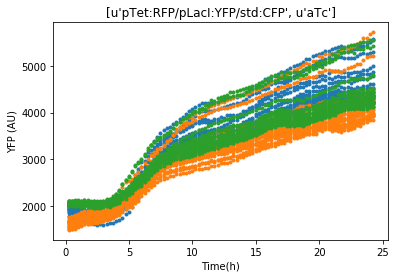

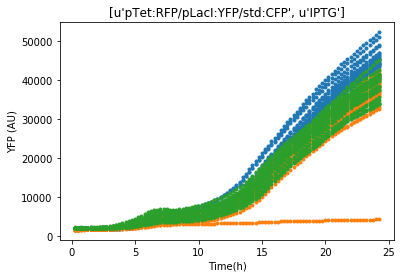

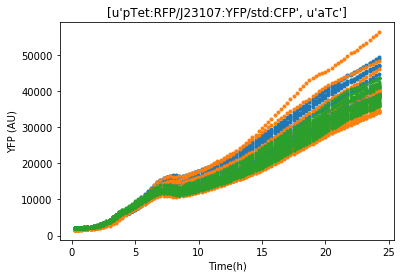

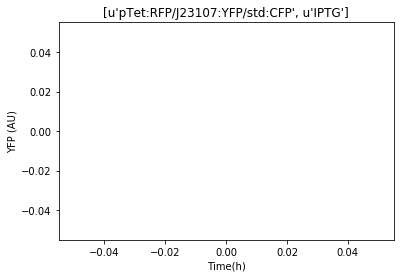

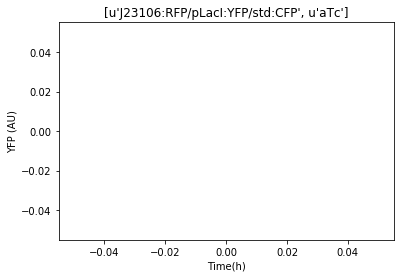

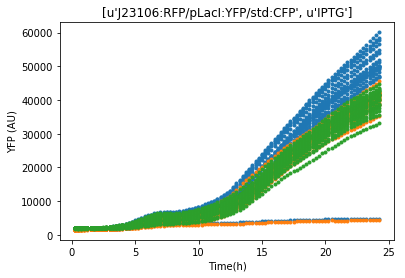

In [103]:
for p in pnames:
    for i in innames:
        plt.figure()
        plt.title([p,i])
        plt.plot(dfexp[dfexp.samples_experiment_id==2][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==2][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==3][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==3][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==4][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==4][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:500/27,540/25']['measurements_value'], '.')
        
        plt.xlabel('Time(h)')
        plt.ylabel('YFP (AU)')

C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


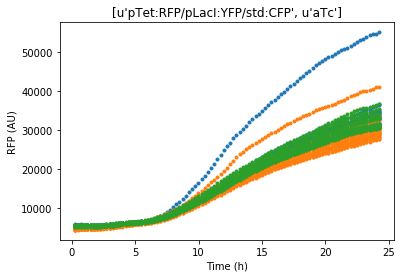

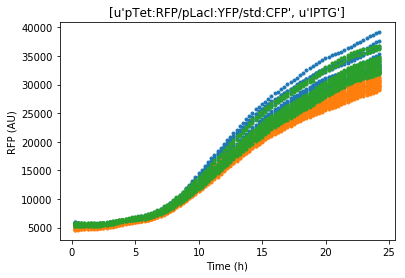

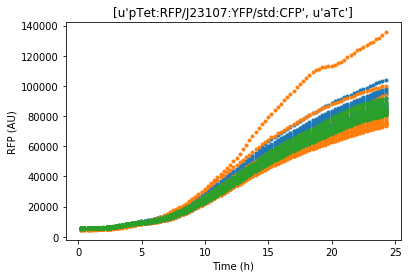

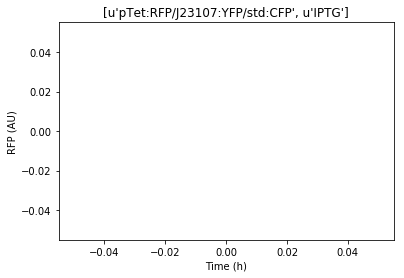

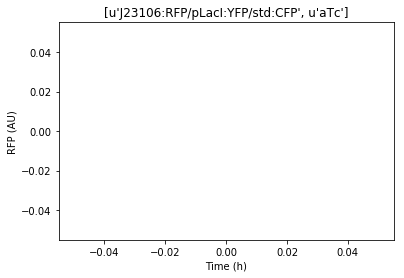

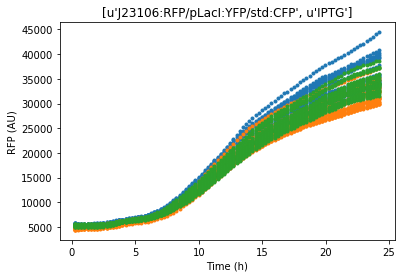

In [101]:
for p in pnames:
    for i in innames:
        plt.figure()
        plt.title([p,i])
        plt.plot(dfexp[dfexp.samples_experiment_id==2][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==2][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==3][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==3][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        plt.plot(dfexp[dfexp.samples_experiment_id==4][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='CFP:420/50,485/20']['measurements_time'],dfexp[dfexp.samples_experiment_id==4][dfexp.inducers_name==i][dfexp.plasmids_name==p][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
        
        plt.xlabel('Time (h)')
        plt.ylabel('RFP (AU)')


Selection of a specific experiment (skip if all data required)

In [153]:
atc1=dfexp[dfexp.inducers_name=='aTc'][dfexp.samples_experiment_id==2][dfexp.plasmids_name=='pTet:RFP/J23107:YFP/std:CFP'][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['supplements_concentration']
atc2=dfexp[dfexp.inducers_name=='aTc'][dfexp.samples_experiment_id==3][dfexp.plasmids_name=='pTet:RFP/J23107:YFP/std:CFP'][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['supplements_concentration']
atc3=dfexp[dfexp.inducers_name=='aTc'][dfexp.samples_experiment_id==4][dfexp.plasmids_name=='pTet:RFP/J23107:YFP/std:CFP'][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['supplements_concentration']
atc = dfexp[dfexp.inducers_name=='aTc']['supplements_concentration']

print len(atc1)
print len(atc2)
print len(atc3)



C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


1940
1940
1940
0        1.081468e-06
1        5.400734e-07
2        4.320587e-07
3        2.160293e-07
4        1.728235e-07
5        1.296176e-07
6        1.081468e-07
7        6.480881e-08
8        4.320587e-08
9        2.160293e-08
10       2.160293e-08
11       4.320587e-08
12       6.480881e-08
13       1.081468e-07
14       1.296176e-07
15       1.728235e-07
16       2.160293e-07
17       4.320587e-07
18       5.400734e-07
19       1.081468e-06
20       1.081468e-06
21       5.400734e-07
22       4.320587e-07
23       2.160293e-07
24       1.728235e-07
25       1.296176e-07
26       1.081468e-07
27       6.480881e-08
28       4.320587e-08
29       2.160293e-08
             ...     
93050    2.160293e-08
93051    4.320587e-08
93052    6.480881e-08
93053    1.081468e-07
93054    1.296176e-07
93055    1.728235e-07
93056    2.160293e-07
93057    4.320587e-07
93058    5.400734e-07
93059    1.081468e-06
93060    1.081468e-06
93061    5.400734e-07
93062    4.320587e-07
93063    2.160293

In [126]:
iptg1=dfexp[dfexp.inducers_name=='IPTG'][dfexp.plasmids_name=='pTet:RFP/pLacI:YFP/std:CFP']['supplements_concentration']
iptg2=dfexp[dfexp.inducers_name=='IPTG'][dfexp.plasmids_name=='pTet:RFP/pLacI:YFP/std:CFP']['supplements_concentration']
iptg3=dfexp[dfexp.inducers_name=='IPTG'][dfexp.plasmids_name=='pTet:RFP/pLacI:YFP/std:CFP']['supplements_concentration']


print len(iptg1)
print len(iptg2)
print len(iptg3)


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


23280
23280
23280


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\Users\maca\Anaconda3\envs\flapjack\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Text(0,0.5,u'RFP (AU)')

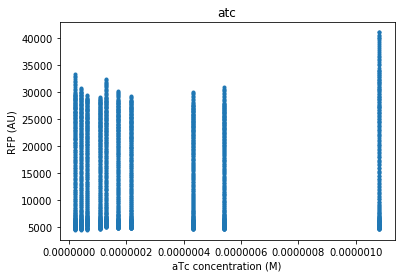

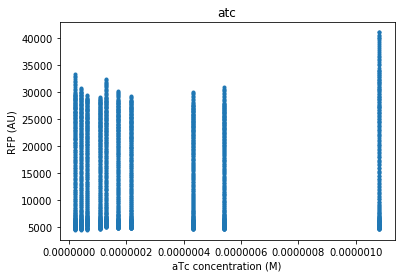

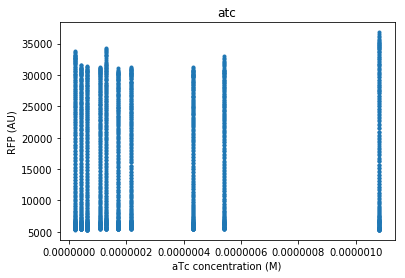

In [159]:
plt.figure()
plt.title('atc')
plt.plot(atc1,dfexp[dfexp.samples_experiment_id==3][dfexp.inducers_name=='aTc'][dfexp.plasmids_name=='pTet:RFP/pLacI:YFP/std:CFP'][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
plt.xlabel('aTc concentration (M)')
plt.ylabel('RFP (AU)')


plt.figure()
plt.title('atc')
plt.xlabel('aTc concentration (M)')
plt.ylabel('RFP (AU)')
plt.plot(atc2,dfexp[dfexp.samples_experiment_id==3][dfexp.inducers_name=='aTc'][dfexp.plasmids_name=='pTet:RFP/pLacI:YFP/std:CFP'][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')


plt.figure()
plt.title('atc')
plt.plot(atc3,dfexp[dfexp.samples_experiment_id==4][dfexp.inducers_name=='aTc'][dfexp.plasmids_name=='pTet:RFP/pLacI:YFP/std:CFP'][dfexp.measurements_name=='RFP-YFP:585/10,620/15']['measurements_value'], '.')
plt.xlabel('aTc concentration (M)')
plt.ylabel('RFP (AU)')


In [156]:
dfexp[dfexp.inducers_name=='aTc']['supplements_concentration']
dfexp[dfexp.inducers_name=='IPTG']['supplements_concentration']

40       0.00100
41       0.00020
42       0.00015
43       0.00010
44       0.00007
45       0.00005
46       0.00004
47       0.00003
48       0.00002
49       0.00001
50       0.00001
51       0.00002
52       0.00003
53       0.00004
54       0.00005
55       0.00007
56       0.00010
57       0.00015
58       0.00020
59       0.00100
60       0.00100
61       0.00020
62       0.00015
63       0.00010
64       0.00007
65       0.00005
66       0.00004
67       0.00003
68       0.00002
69       0.00001
          ...   
93090    0.00001
93091    0.00002
93092    0.00003
93093    0.00004
93094    0.00005
93095    0.00007
93096    0.00010
93097    0.00015
93098    0.00020
93099    0.00100
93100    0.00100
93101    0.00020
93102    0.00015
93103    0.00010
93104    0.00007
93105    0.00005
93106    0.00004
93107    0.00003
93108    0.00002
93109    0.00001
93110    0.00001
93111    0.00002
93112    0.00003
93113    0.00004
93114    0.00005
93115    0.00007
93116    0.00010
93117    0.000

Pandas data series can be directly plotted using Matplotlib/Pyplot:

Text(0,0.5,u'cfp (AU)')

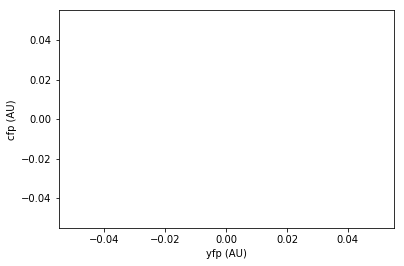

In [11]:
plt.figure()
plt.plot(yfp_glic['measurements_value'], cfp_glic['measurements_value'], '.')
plt.xlabel('yfp (AU)')
plt.ylabel('cfp (AU)')

In the end for complete analysis we can get simple numpy arrays by using the `values` attribute, for example:

Text(0,0.5,u'cfp (AU)')

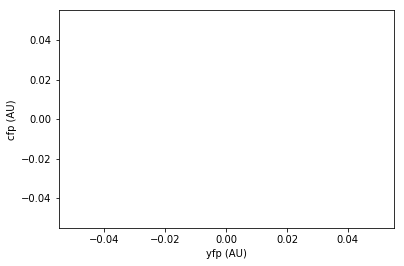

In [7]:
y = yfp_glic['measurements_value'].values
c = cfp_glic['measurements_value'].values
t = cfp_glic['measurements_time'].values
od = od_glic['measurements_value'].values
plt.plot(c,y,'.')
plt.xlabel('yfp (AU)')
plt.ylabel('cfp (AU)')